# Quantifying mean termination times
Tim Tyree<br>
9.23.2022

In [34]:
from IPython.display import clear_output
clear_output(wait=True)

import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *

os.chdir(nb_dir)
from lib import *

# import cupy, cudf
# from lib.rapids_func import *

import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

In [227]:
from lib.measure.bootstrap import comp_mean_bootstrap_uncertainty
from scipy.stats import erlang,gamma

# define module

# parse fortranic spiral tip position data

In [2]:
# input_fn = search_for_file()
# input_fn

# #load fortranic log of spiral tip positions
# df_log=parse_fortranic_tip_pos(input_fn)
# df_log.shape

In [3]:
# #save fortranic log of spiral tip positions to .parquet 
# log_dir_fk = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_log.parquet'
# df_log.to_parquet(log_dir_fk,compression='snappy',index=None)
# assert os.path.exists(log_dir_fk)
# print(f"{log_dir_fk=}")

# dev

In [6]:
log_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_log.parquet'
log_dir_lr = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_log.parquet'

count    147.000000
mean       2.095238
std        0.540590
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: n, dtype: float64

In [281]:
#compute termintion times
tscale=1e-3# s per ms
df=pd.read_parquet(log_dir_fk)
dict_term_lst=[]
for trial_num,g in df.groupby(by='trial_num'):
    descr = g.describe()
    t_term = tscale*descr['t'].T['max'] #- descr['t'].T['min']
    n_time_series = g.groupby(by='t')['n'].max()
    descrn = dict(n_time_series.describe())
    #record termination event
    dict_term = dict(
        trial_num=trial_num,
        t_term=t_term)
    for key in descrn:
        dict_term[f"n_{key}"] = descrn[key]
    dict_term_lst.append(dict_term)
df_term_fk = pd.DataFrame(dict_term_lst)
df_term_fk.describe()

,trial_num,t_term,n_count,n_mean,n_std,n_min,n_25%,n_50%,n_75%,n_max
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000,81.000000,81.000000
mean,40.000000,27.796580,27796.580247,8.111346,3.171279,2.0,5.876543,7.876543,10.074074,21.000000
std,23.526581,27.960543,27960.543177,0.596583,0.302605,0.0,0.659218,0.659218,0.737865,3.424179
min,0.000000,0.354000,354.000000,5.884444,2.231458,2.0,2.000000,4.000000,6.000000,14.000000
25%,20.000000,10.356000,10356.000000,7.890555,2.999255,2.0,6.000000,8.000000,10.000000,18.000000
50%,40.000000,19.474000,19474.000000,8.228006,3.172377,2.0,6.000000,8.000000,10.000000,22.000000
75%,60.000000,39.253000,39253.000000,8.492502,3.297967,2.0,6.000000,8.000000,10.000000,22.000000
max,80.000000,150.955000,150955.000000,9.229633,4.568219,2.0,8.000000,10.000000,12.000000,32.000000


In [282]:
#effect of not overcounting time slices on mean particle number
# 9.36 +/- 3.1
# --> 8.11 +/- 3.17

In [283]:
df=pd.read_parquet(log_dir_lr)
dict_term_lst=[]
for trial_num,g in df.groupby(by='trial_num'):
    descr = g.describe()
    t_term = tscale*descr['t'].T['max'] #- descr['t'].T['min']
    n_time_series = g.groupby(by='t')['n'].max()
    descrn = dict(n_time_series.describe())
    #record termination event
    dict_term = dict(
        trial_num=trial_num,
        t_term=t_term)
    for key in descrn:
        dict_term[f"n_{key}"] = descrn[key]
    dict_term_lst.append(dict_term)
df_term_lr = pd.DataFrame(dict_term_lst)
df_term_lr.describe()

,trial_num,t_term,n_count,n_mean,n_std,n_min,n_25%,n_50%,n_75%,n_max
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,320.000000,0.742190,742.190328,4.980033,2.384248,2.024961,3.235179,4.564743,6.264041,14.279251
std,185.185043,0.709408,709.407861,1.269500,0.748515,0.248749,1.258167,1.559278,1.876717,4.073354
min,0.000000,0.002000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,160.000000,0.249000,249.000000,4.124031,1.913731,2.000000,2.000000,4.000000,6.000000,12.000000
50%,320.000000,0.530000,530.000000,4.979656,2.347957,2.000000,4.000000,4.000000,6.000000,14.000000
75%,480.000000,1.014000,1014.000000,5.731935,2.805486,2.000000,4.000000,6.000000,8.000000,16.000000
max,640.000000,5.154000,5154.000000,9.423881,6.889606,6.000000,8.000000,10.000000,12.000000,30.000000


In [285]:
#save as .csv
term_dir_fk = log_dir_fk.replace('_log.parquet','_termination_times.csv')
df_term_fk.to_csv(term_dir_fk,index=False)

term_dir_lr = log_dir_lr.replace('_log.parquet','_termination_times.csv')
df_term_lr.to_csv(term_dir_lr,index=False)

print(f"{term_dir_fk=}")
print(f"{term_dir_lr=}")

term_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_termination_times.csv'
term_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_termination_times.csv'


# quantify mean termination times

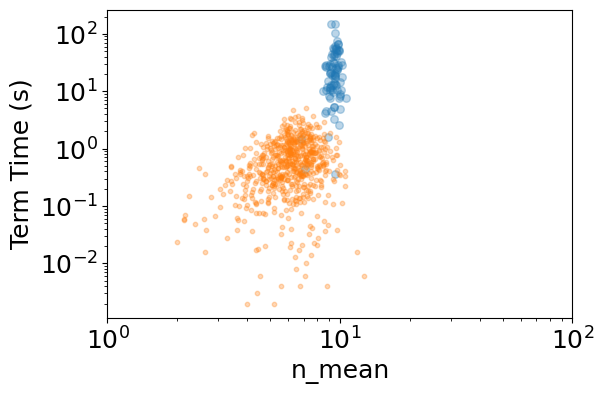

In [30]:
#scatter plot max num particles versus termination time
# Q: are there any obvious outliers? 
# A: nah. it looks relatively reasonable.
fig,ax=plt.subplots(figsize=(6,4))
fontsize=18
# xcol='n_max'
# xcol='n_count'
xcol='n_mean'
xlim=[1,100]
df_term_fk.plot.scatter(x=xcol,y='t_term',color='C0',alpha=0.3,s=30,ax=ax)
df_term_lr.plot.scatter(x=xcol,y='t_term',color='C1',alpha=0.3,s=10,ax=ax)
format_plot(ax=ax,xlabel=xcol,ylabel='Term Time (s)',fontsize=fontsize,use_loglog=True)
ax.set_xlim(xlim)
plt.show()

In [100]:
#bootstrap mean +/- 95% CI
t_term_values_fk = df_term_fk['t_term'].values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(t_term_values_fk,num_samples=100)
printing=True
if printing:
    print(f"Fenton-Karma:")
    print(f" - mean termination time: {meanx:.4f} +/- {Delta_meanx:.4f} s (N_term_events={num_obsx}, p_normal: {p_normalx:.4f})")

dict_mtt_fk = dict(model='Fenton-Karma',
                mtt=meanx,
                Delta_mtt=Delta_meanx,
                num_term_events=num_obsx,
                p_normal=p_normalx)

#bootstrap mean +/- 95% CI
t_term_values_lr = df_term_lr['t_term'].values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(t_term_values_lr,num_samples=100)
printing=True
if printing:
    print(f"Luo-Rudy:")
    print(f" - mean termination time: {meanx:.4f} +/- {Delta_meanx:.4f} s (N_term_events={num_obsx}, p_normal: {p_normalx:.4f})")

dict_mtt_lr = dict(model='Luo-Rudy',
                mtt=meanx,
                Delta_mtt=Delta_meanx,
                num_term_events=num_obsx,
                p_normal=p_normalx)


df_mtt = pd.DataFrame([dict_mtt_fk,dict_mtt_lr])
print(f"termination times saved in:")
print(f"{term_dir_fk=}")
print(f"{term_dir_lr=}")
print(df_mtt)

Fenton-Karma:
 - mean termination time: 27.7966 +/- 6.5012 s (N_term_events=81, p_normal: 0.2800)
Luo-Rudy:
 - mean termination time: 0.7422 +/- 0.0586 s (N_term_events=641, p_normal: 0.4695)
termination times saved in:
term_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_termination_times.csv'
term_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_termination_times.csv'
          model       mtt  Delta_mtt  num_term_events  p_normal
0  Fenton-Karma  27.79658   6.501226               81  0.280022
1      Luo-Rudy   0.74219   0.058607              641  0.469457


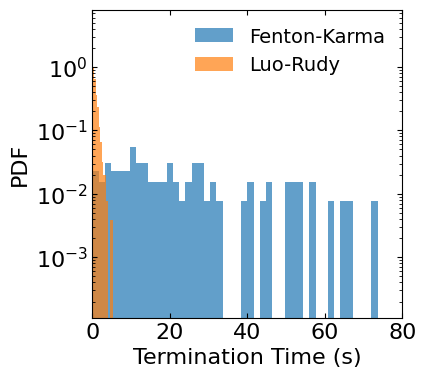

In [101]:
#TODO: plot histogram as a scatter plot of the .pdf
fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.7
# xcol='n_max'
# xcol='n_count'
xcol='n_mean'
# bins = np.logspace(-3,3,20)
# xlim=[0,250]
xlim=[0,20]
# xlim=[0,80]
# ax.hist(t_term_values_fk,color='C0',alpha=0.3,density=True,bins=bins)
# ax.hist(t_term_values_lr,color='C1',alpha=0.3,density=True,bins=bins)
# bins = np.arange(0.,22.,1.6)
bins = np.arange(0.,220.,1.6)
ax.hist(t_term_values_fk,color='C0',alpha=alpha,density=True,bins=bins,stacked=True,label='Fenton-Karma')
# bins = np.linspace(0.,20.,51)
bins = np.arange(0.,220.,0.4)
ax.hist(t_term_values_lr,color='C1',alpha=alpha,density=True,bins=bins,stacked=True,label='Luo-Rudy')

#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='PDF',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
ax.set_ylim((11*1.0178650359332904e-05, 8))
# format_plot(ax=ax,xlabel=r'$\Gamma$ (s)',ylabel=r'PDF',fontsize=fontsize,use_loglog=use_loglog)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)


plt.show()

# quantify distribution of termination events using bootstrap sampling with replacement

__Observation__:
my termination times don't have the exponential distribution reported in VidmarRappel2019.pdf.

DONT: __Option 1:__ - use only LR for the planned analysis

TODO: __Option 2:__ - augment the FK data using bootstrap.
for sample_num in range(num_samples):
    1. randomly select 1 trial
    2. randomly select 1 time instance
    3. record n and the time to termination event
    
then, 
1. scatter plot n versus t_term
2. compute histogram of termination times.  does it match WJ's previous histogram?

In [176]:
log_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_log.parquet'
log_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_log.parquet'
print(f"{log_dir_fk=}")
print(f"{log_dir_lr=}")
# term_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_termination_times.csv'
# term_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_termination_times.csv'
# print(f"{term_dir_fk=}")
# print(f"{term_dir_lr=}")

# num_samples=1000 #40 ms
num_samples=10000
random_state = 42
tscale=1e-3 #s per ms

#warning: estimated run time 5.5 minutes for 10000 samples
#FK
df=pd.read_parquet(log_dir_fk)
#bootstrap temrintion time distribution
df_sampled = df.sample(num_samples,random_state=random_state,replace=True)
df_sampled['tf']=np.nan
for index,row in df_sampled.iterrows():
    tf = df.loc[row['trial_num']==df['trial_num']]['t'].max()
    df_sampled.loc[index,'tf']=tf
df_sampled['t_term'] = tscale*(df_sampled['tf'] - df_sampled['t'])
df_sampled_fk = df_sampled.copy()

#LR
df=pd.read_parquet(log_dir_lr)
df_sampled = df.sample(num_samples,random_state=random_state,replace=True)
df_sampled['tf']=np.nan
for index,row in df_sampled.iterrows():
    tf = df.loc[row['trial_num']==df['trial_num']]['t'].max()
    df_sampled.loc[index,'tf']=tf
df_sampled['t_term'] = tscale*(df_sampled['tf'] - df_sampled['t'])
df_sampled_lr = df_sampled.copy()

log_dir_fk='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_log.parquet'
log_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_log.parquet'


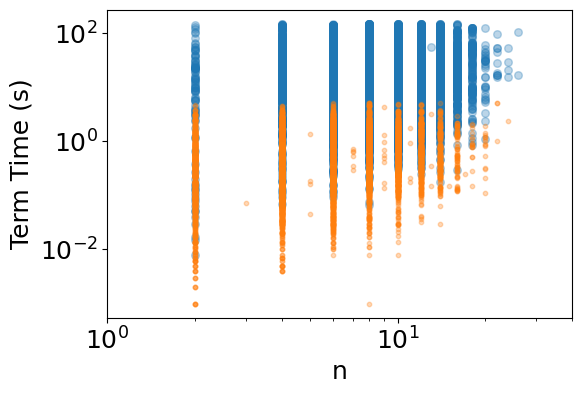

In [181]:
#scatter plot max num particles versus termination time
# Q: are there any obvious outliers? 
# A: nah. it looks relatively reasonable.
fig,ax=plt.subplots(figsize=(6,4))
fontsize=18
# xcol='n_max'
# xcol='n_count'
xcol='n'
xlim=[1,40]
df_sampled_fk.plot.scatter(x=xcol,y='t_term',color='C0',alpha=0.3,s=30,ax=ax)
df_sampled_lr.plot.scatter(x=xcol,y='t_term',color='C1',alpha=0.3,s=10,ax=ax)
format_plot(ax=ax,xlabel=xcol,ylabel='Term Time (s)',fontsize=fontsize,use_loglog=True)
ax.set_xlim(xlim)
plt.show()

In [182]:
#bootstrap mean +/- 95% CI
t_term_values_fk = df_sampled_fk['t_term'].values
# t_term_values_fk = df_term_fk['t_term'].values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(t_term_values_fk,num_samples=100)
printing=True
if printing:
    print(f"Fenton-Karma:")
    print(f" - mean termination time: {meanx:.4f} +/- {Delta_meanx:.4f} s (N_term_events={num_obsx}, p_normal: {p_normalx:.4f})")

dict_mtt_fk = dict(model='Fenton-Karma',
                mtt=meanx,
                Delta_mtt=Delta_meanx,
                num_term_events=num_obsx,
                p_normal=p_normalx)

#bootstrap mean +/- 95% CI
t_term_values_lr = df_sampled_lr['t_term'].values
# t_term_values_lr = df_term_lr['t_term'].values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(t_term_values_lr,num_samples=100)
printing=True
if printing:
    print(f"Luo-Rudy:")
    print(f" - mean termination time: {meanx:.4f} +/- {Delta_meanx:.4f} s (N_term_events={num_obsx}, p_normal: {p_normalx:.4f})")

dict_mtt_lr = dict(model='Luo-Rudy',
                mtt=meanx,
                Delta_mtt=Delta_meanx,
                num_term_events=num_obsx,
                p_normal=p_normalx)


df_mtt = pd.DataFrame([dict_mtt_fk,dict_mtt_lr])
# print(f"termination times saved in:")
# print(f"{term_dir_fk=}")
# print(f"{term_dir_lr=}")
print(df_mtt)

Fenton-Karma:
 - mean termination time: 28.1166 +/- 0.5483 s (N_term_events=10000, p_normal: 0.6946)
Luo-Rudy:
 - mean termination time: 0.7456 +/- 0.0145 s (N_term_events=10000, p_normal: 0.9132)
          model        mtt  Delta_mtt  num_term_events  p_normal
0  Fenton-Karma  28.116557   0.548336            10000  0.694565
1      Luo-Rudy   0.745636   0.014456            10000  0.913182


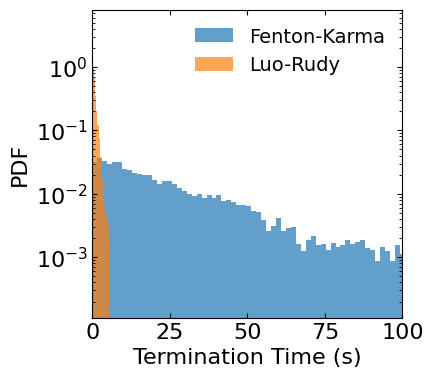

In [193]:
#TODO: plot histogram as a scatter plot of the .pdf
fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.7
# xlim=[0,250]
xlim=[0,100]
# xlim=[0,20]
# xlim=[0,80]
# ax.hist(t_term_values_fk,color='C0',alpha=0.3,density=True,bins=bins)
# ax.hist(t_term_values_lr,color='C1',alpha=0.3,density=True,bins=bins)
# bins = np.arange(0.,22.,1.6)
# bins = np.arange(0.,220.,0.4)
bins = np.arange(0.,220.,1.6)
ax.hist(t_term_values_fk,color='C0',alpha=alpha,density=True,bins=bins,stacked=True,label='Fenton-Karma')
# bins = np.linspace(0.,20.,51)
bins = np.arange(0.,220.,0.4)
ax.hist(t_term_values_lr,color='C1',alpha=alpha,density=True,bins=bins,stacked=True,label='Luo-Rudy')

#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='PDF',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
ax.set_ylim((11*1.0178650359332904e-05, 8))
# format_plot(ax=ax,xlabel=r'$\Gamma$ (s)',ylabel=r'PDF',fontsize=fontsize,use_loglog=use_loglog)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)


plt.show()

In [286]:
#TODO: compute xy values of histogram
# bins_fk=np.arange(0,50,1.6)
# bins_fk=np.arange(0,20,0.4)
bins_fk=np.arange(0,40,0.4)
# bins_fk=np.arange(0,40,1)
#DONE: compute the histograms
barheights_fk,bins_fk = np.histogram(
    t_term_values_fk,
    bins=bins_fk,#10,
    range=None,
    normed=None,
    weights=None,
    density=False,
)
t_term_fk=0.5*(bins_fk[1:]+bins_fk[:-1])

# bins_lr=np.arange(0,16,0.4)
bins_lr=np.arange(0,40,0.4)
# bins_lr=np.arange(0,40,1)
barheights_lr,bins_lr = np.histogram(
    t_term_values_lr,
    bins=bins_lr,#bins[bins<0.45],#10,
    range=None,
    normed=None,
    weights=None,
    density=False,
)
t_term_lr=0.5*(bins_lr[1:]+bins_lr[:-1])
num_samples = t_term_values_lr.shape[0]
prob_fk = barheights_fk/(bins_fk[1:]-bins_fk[:-1])/num_samples
num_samples = t_term_values_fk.shape[0]
prob_lr = barheights_lr/(bins_lr[1:]-bins_lr[:-1])/num_samples
# prob_fk = barheights_fk/num_samples
# prob_lr = barheights_lr/num_samples

#fit analytic functions to these distributions
shpe_fk,loc_fk,scale_fk = gamma.fit(t_term_values_fk,method='MLE')
shpe_lr,loc_lr,scale_lr = gamma.fit(t_term_values_lr,method='MLE')
 # erlang.fit(t_term_values_fk),


print(f"MLE fits of MTT: shape, loc, scale")
print(f"Fenton-Karma: {shpe_fk:.4f},{loc_fk:.4f},{scale_fk:.4f}")
print(f"Luo-Rudy: {shpe_lr:.4f},{loc_lr:.4f},{scale_lr:.4f}")

MLE fits of MTT: shape, loc, scale
Fenton-Karma: 0.9841,0.0080,28.5539
Luo-Rudy: 1.1556,-0.0002,0.6454


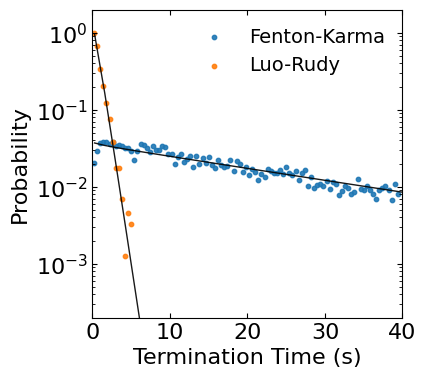

In [272]:
fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.9
# xlim=[0,250]
# xlim=[0,100]
# xlim=[0,20]
xlim=[0,40]

# #plot histograms
# bins = np.arange(0.,220.,1.6)
# ax.hist(t_term_values_fk,color='C0',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Fenton-Karma')
# bins = np.arange(0.,220.,0.4)
# ax.hist(t_term_values_lr,color='C1',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Luo-Rudy')

# #plot line plot traces
# ax.plot(t_term_fk,prob_fk,color='C0',alpha=alpha,label='Fenton-Karma')
# ax.plot(t_term_lr,prob_lr,color='C1',alpha=alpha,label='Luo-Rudy')
#plot line plot traces
ax.scatter(t_term_fk,prob_fk,color='C0',alpha=alpha,label='Fenton-Karma',s=10)
ax.scatter(t_term_lr,prob_lr,color='C1',alpha=alpha,label='Luo-Rudy',s=10)

x = np.linspace(gamma.ppf(0.01, shpe_fk,loc=loc_fk,scale=scale_fk),
                gamma.ppf(0.99, shpe_fk,loc=loc_fk,scale=scale_fk), 100)
# x = np.arange(0.1,40,0.4)
ax.plot(x, gamma.pdf(x, shpe_fk,loc=loc_fk,scale=scale_fk),
       'k-', lw=1, alpha=alpha, label='_MLE Fit')
ax.plot(x, gamma.pdf(x, shpe_lr,loc=loc_lr,scale=scale_lr),
       'k-', lw=1, alpha=alpha, label='_MLE Fit')

#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='Probability',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
# ax.set_ylim((11*1.0178650359332904e-05, 8))
ax.set_ylim((2e-4, 2))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)
plt.show()

for LR model, it looks like $Prob[T_{term}]\sim e^{-T_{term}/\tau_{LR}}$.

for FK model, it looks like $Prob[T_{term}]\sim T_{term}^k e^{-T_{term}/\tau_{LR}}$.



In [220]:
erlang.fit(t_term_values_lr)

(1.1555431189836654, -0.000164782367815039, 0.6454112781323953)

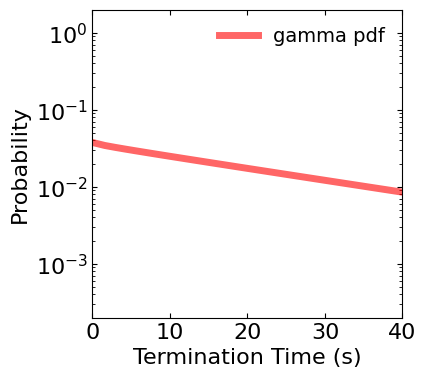

In [226]:
fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.9
# xlim=[0,250]
# xlim=[0,100]
# xlim=[0,20]
xlim=[0,40]




#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='Probability',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
# ax.set_ylim((11*1.0178650359332904e-05, 8))
ax.set_ylim((2e-4, 2))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)
plt.show()

In [1]:
422+345+344+394+307+273+250+228+234+361+270+103

3531

In [2]:
19*16

304

In [3]:
3531+304

3835

In [4]:
3835-3750

85

In [ ]:
$V_\text{threshold}=0.4V''-V'=$.
% V ′ = 90mV and V ′′ = 150mV

In [5]:
0.4*150-90

-30.0